# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [28]:
import pandas as pd
from numpy import random 
from citipy import citipy
import matplotlib.pyplot as plt
from scipy.stats import linregress
import requests
from pprint import pprint
from config import weather_api_key
import json

## Generate Cities List

In [3]:
rand_lat_gen = random.uniform(-90,91,1500)
rand_lon_gen = random.uniform(-180,181,1500)

city_corr = {"rand_lat": rand_lat_gen,
            "rand_lon": rand_lon_gen}

city_corr = pd.DataFrame(city_corr)

city_list = []
country_list = []

for i in city_corr.index:
    latitude = city_corr.iloc[int(i),0]
    longitude = city_corr.iloc[int(i),1]
    location = citipy.nearest_city(latitude,longitude)
    city = location.city_name
    ctry = location.country_code
    city_list.append(city)
    country_list.append(ctry)
    
city_corr['City'] = city_list
city_corr['Country'] = country_list
city_corr.head()



,rand_lat,rand_lon,City,Country
0,23.492770,-95.994862,nuevo progreso,mx
1,-29.940161,-115.808329,rikitea,pf
2,73.810347,-13.070312,husavik,is
3,-14.191025,-102.184959,puerto ayora,ec
4,56.070131,-94.188464,thompson,ca


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
city_lats = []
city_lons = []
city_names = []
cloudss = []
countrys = []
dates = []
humiditys = []
max_temps = []
wind_speeds = []

for i in city_corr.index:
    city_name = city_corr.iloc[int(i),2]
    country_code = city_corr.iloc[int(i),3]
    
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city_name},{country_code}&appid={weather_api_key}&cnt=1&units=imperial"
    cities = requests.get(url).json()
    
    try:
        city_lat = cities['coord']['lat']
        city_lon = cities['coord']['lon']
        city_name = cities['name']
        clouds = cities['clouds']['all']
        country = cities['sys']['country']
        date = cities['dt']
        humidity = cities['main']['humidity']
        max_temp = cities['main']['temp_max']
        wind_speed = cities['wind']['speed']
        
        city_lats.append(city_lat)
        city_lons.append(city_lon)
        city_names.append(city_name)
        cloudss.append(clouds)
        countrys.append(country)
        dates.append(date)
        humiditys.append(humidity)
        max_temps.append(max_temp)
        wind_speeds.append(wind_speed)
        
        print(f"Data found: {city_name}, {country_code}")
    
    except KeyError as e:
        print(f'{city_name} not found')
    


Data found: Nuevo Progreso, mx
Data found: Rikitea, pf
Data found: Husavik, is
Data found: Puerto Ayora, ec
Data found: Thompson, ca
Data found: Anadyr, ru
Data found: Bethel, us
Data found: Ushuaia, ar
Data found: Ostrovnoy, ru
Data found: Punta Arenas, cl
Data found: Kalmunai, lk
Data found: Upernavik, gl
Data found: Avarua, ck
Data found: Djibo, bf
Data found: Busselton, au
Data found: La Plaine, dm
Data found: Punta Arenas, cl
Data found: Dekar, bw
tokzar not found
Data found: Yangambi, cd
Data found: Coquimbo, cl
Data found: Saint George, bm
Data found: Butaritari, ki
Data found: Phuket, th
Data found: Jamestown, sh
Data found: Naze, jp
Data found: Cape Town, za
Data found: Mamou, gn
Data found: Puerto Ayora, ec
kachikau not found
Data found: Nampula, mz
Data found: Rikitea, pf
Data found: Thompson, ca
Data found: Saldanha, za
Data found: Aklavik, ca
Data found: Rikitea, pf
Data found: Esperance, au
Data found: Sambava, mg
Data found: Vaini, to
Data found: Svetlogorsk, ru
Data fou

Data found: Kabare, cd
Data found: Saint Paul Harbor, us
Data found: Jamestown, sh
Data found: Novorudnyy, ru
Data found: Mampong, gh
Data found: Antalaha, mg
Data found: Jumla, np
tsihombe not found
Data found: Fort Nelson, ca
Data found: Hilo, us
Data found: Bluff, nz
Data found: Sobolevo, ru
Data found: Porto Tolle, it
Data found: Rikitea, pf
Data found: Collie, au
Data found: Guadalupe y Calvo, mx
Data found: Dukat, ru
Data found: Provideniya, ru
Data found: Provideniya, ru
Data found: Kasempa, zm
Data found: Témiscaming, ca
Data found: Upernavik, gl
Data found: Fortuna, us
Data found: Katherine, au
Data found: Mount Gambier, au
Data found: Maningrida, au
Data found: Nadezhda, ru
Data found: Tongzi, cn
Data found: Ushuaia, ar
Data found: East London, za
Data found: Kahului, us
Data found: Barrow, us
Data found: San Quintín, mx
Data found: Cape Town, za
Data found: Kochi, in
Data found: Punta Arenas, cl
Data found: Albany, au
Data found: Albany, au
Data found: Vaini, to
Data found: 

Data found: Bethel, us
khani not found
Data found: Punta Arenas, cl
Data found: East London, za
Data found: Punta Arenas, cl
Data found: Luanda, ao
Data found: Carnarvon, au
Data found: East London, za
Data found: Lompoc, us
Data found: Faanui, pf
Data found: Río Gallegos, ar
Data found: Garoowe, so
Data found: Ouahigouya, bf
Data found: Castro, cl
Data found: Yellowknife, ca
Data found: Okmulgee, us
mataura not found
Data found: Poções, br
Data found: Butaritari, ki
Data found: Bodden Town, ky
Data found: Margate, za
Data found: Castro, cl
Data found: Ribeira Grande, pt
Data found: Tual, id
Data found: Victoria, sc
Data found: Tacoma, us
Data found: New Norfolk, au
Data found: Juegang, cn
talah not found
Data found: Greymouth, nz
Data found: Tuktoyaktuk, ca
Data found: Butaritari, ki
Data found: Yumen, cn
Data found: São João da Barra, br
Data found: Pisco, pe
Data found: Yellowknife, ca
Data found: Saskylakh, ru
Data found: Chokurdakh, ru
Data found: Puerto Ayora, ec
Data found: Coyh

Data found: Ilulissat, gl
Data found: Yellowknife, ca
Data found: Muravlenko, ru
ji-parana not found
Data found: Margate, za
Data found: Mar del Plata, ar
Data found: Avarua, ck
Data found: Ponta do Sol, cv
Data found: Alta Floresta, br
attawapiskat not found
Data found: Rikitea, pf
Data found: Piaçabuçu, br
mataura not found
Data found: Cape Town, za
Data found: Busselton, au
Data found: Barrow, us
Data found: Bredasdorp, za
Data found: Qaqortoq, gl
Data found: Molchanovo, ru
Data found: Busselton, au
Data found: Lorengau, pg
Data found: Caravelas, br
Data found: Upernavik, gl
Data found: Nikolskoye, ru
Data found: Busselton, au
Data found: Pacific Grove, us
Data found: Punta Arenas, cl
Data found: Dingle, ie
Data found: Pangai, to
Data found: Kavieng, pg
Data found: Carnarvon, au
Data found: Khatanga, ru
Data found: Ambon City, id
Data found: Nikolskoye, ru
Data found: Chokurdakh, ru
Data found: Noyabrsk, ru
Data found: Walvis Bay, na
Data found: Ancud, cl
Data found: Ambilobe, mg
Da

Data found: Warrnambool, au
Data found: Atuona, pf
Data found: Georgetown, sh
Data found: Lebu, cl
Data found: Hobart, au
Data found: Vyazemskiy, ru
Data found: Altay, cn
Data found: Barrow, us
Data found: Il’inskiy, ru
Data found: Isiro, cd
Data found: Port Alfred, za
Data found: Bluff, nz
Data found: Hermanus, za
Data found: Iqaluit, ca
tsihombe not found
Data found: Barrow, us
Data found: Mandapam, in
Data found: Dunedin, nz
Data found: Albany, au
Data found: Bredasdorp, za
Data found: Narsaq, gl
Data found: Tura, ru
Data found: Sioux Lookout, ca
taolanaro not found
Data found: Ahipara, nz
Data found: Santa Marta, co
Data found: Saskylakh, ru
Data found: Sobolevo, ru
mataura not found
Data found: Honningsvåg, no
Data found: Kamenka, ru
Data found: Shimoda, jp
samusu not found
Data found: Kapaa, us
Data found: Rikitea, pf
Data found: Yar-Sale, ru
Data found: Okhotsk, ru
Data found: Ushuaia, ar
Data found: Mazagão, br
faya not found
Data found: Cape Town, za
Data found: Saint-Philippe

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_weather = {
    'City': city_names,
    'Country': countrys,
    'City_Latitude': city_lats,
    'City_Longitude': city_lons,
    'Date': dates,
    'Cloudiness': cloudss,
    'Humidity': humiditys,
    'Max Temp': max_temps,
    'Wind Speed': wind_speeds}

city_weather = pd.DataFrame(city_weather)
city_weather = city_weather.drop_duplicates(subset=['City','Country'], keep='first', inplace=False)
city_weather.to_csv("output_data/city_weather.csv", index=False, header=True)
print(f"{city_weather['City'].count()} cities found")
city_weather.head()

513 cities found


,City,Country,City_Latitude,City_Longitude,Date,Cloudiness,Humidity,Max Temp,Wind Speed
0,Nuevo Progreso,MX,23.1667,-97.9500,1621979255,7,65,92.59,8.01
1,Rikitea,PF,-23.1203,-134.9692,1621979255,55,79,76.95,11.27
2,Husavik,IS,66.0449,-17.3389,1621979255,15,73,51.71,9.91
3,Puerto Ayora,EC,-0.7393,-90.3518,1621979256,35,87,84.16,8.01
4,Thompson,CA,55.7435,-97.8558,1621979256,90,80,30.36,16.11


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

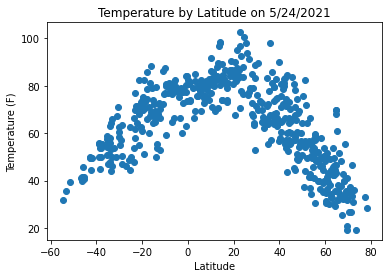

Comparing temperature by latitude on 5/24/2021. Follows a linear trend


<Figure size 432x288 with 0 Axes>

In [77]:
Latitude = city_weather['City_Latitude']
Temperature = city_weather['Max Temp']
plt.scatter(Latitude, Temperature)

plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Temperature by Latitude on 5/24/2021')
plt.show()
print('Comparing temperature by latitude on 5/24/2021. Follows a linear trend')

## Latitude vs. Humidity Plot

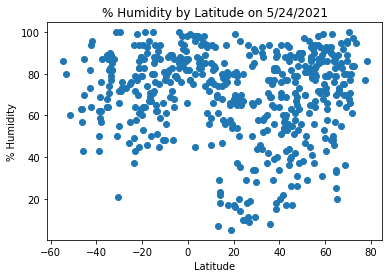

Comparing % humidity by latitude on 5/24/2021. There is no obvious trend


In [78]:
Latitude = city_weather['City_Latitude']
Humidity = city_weather['Humidity']
plt.scatter(Latitude, Humidity)

plt.xlabel('Latitude')
plt.ylabel('% Humidity')
plt.title('% Humidity by Latitude on 5/24/2021')
plt.show()

print('Comparing % humidity by latitude on 5/24/2021. There is no obvious trend')

## Latitude vs. Cloudiness Plot

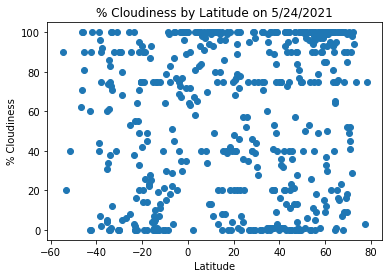

Comparing % cloudiness by latitude on 5/24/2021. There is no obvious trend


In [79]:
Latitude = city_weather['City_Latitude']
Cloudiness = city_weather['Cloudiness']
plt.scatter(Latitude, Cloudiness)

plt.xlabel('Latitude')
plt.ylabel('% Cloudiness')
plt.title('% Cloudiness by Latitude on 5/24/2021')
plt.show()

print('Comparing % cloudiness by latitude on 5/24/2021. There is no obvious trend')

## Latitude vs. Wind Speed Plot

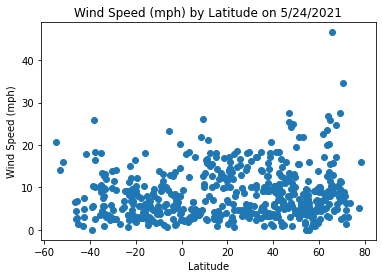

Comparing windspeed by latitude on 5/24/2021. There is no obvious trend


In [80]:
Latitude = city_weather['City_Latitude']
Wind = city_weather['Wind Speed']
plt.scatter(Latitude, Wind)

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Wind Speed (mph) by Latitude on 5/24/2021')
plt.show()

print('Comparing windspeed by latitude on 5/24/2021. There is no obvious trend')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

There is a strong negative linear correlation between temperature and increasing latitude


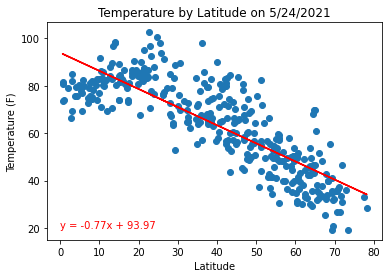

In [81]:
n_hemisphere = city_weather[city_weather['City_Latitude'] >= 0]
Latitude = n_hemisphere['City_Latitude']
Temperature = n_hemisphere['Max Temp']

plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Temperature by Latitude on 5/24/2021')

x_values = Latitude
y_values = Temperature
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=10,color="red")

print('There is a strong negative linear correlation between temperature and increasing latitude')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

There is a strong positive linear correlation between temperature and increasing latitude


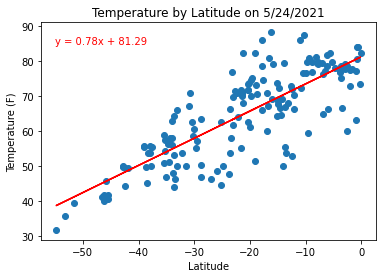

In [82]:
s_hemisphere = city_weather[city_weather['City_Latitude'] < 0]
Latitude = s_hemisphere['City_Latitude']
Temperature = s_hemisphere['Max Temp']

plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Temperature by Latitude on 5/24/2021')

x_values = Latitude
y_values = Temperature
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,85),fontsize=10,color="red")

print('There is a strong positive linear correlation between temperature and increasing latitude')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

There is no correlation between humidity and increasing latitude


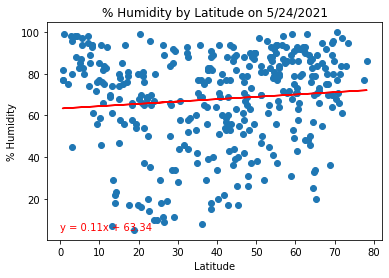

In [83]:
n_hemisphere = city_weather[city_weather['City_Latitude'] >= 0]
Latitude = n_hemisphere['City_Latitude']
Humidity = n_hemisphere['Humidity']

plt.xlabel('Latitude')
plt.ylabel('% Humidity')
plt.title('% Humidity by Latitude on 5/24/2021')

x_values = Latitude
y_values = Humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,5),fontsize=10,color="red")

print('There is no correlation between humidity and increasing latitude')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

There is no correlation between humidity and decreasing latitude


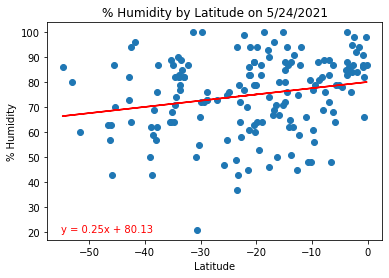

In [84]:
s_hemisphere = city_weather[city_weather['City_Latitude'] < 0]
Latitude = s_hemisphere['City_Latitude']
Humidity = s_hemisphere['Humidity']

plt.xlabel('Latitude')
plt.ylabel('% Humidity')
plt.title('% Humidity by Latitude on 5/24/2021')

x_values = Latitude
y_values = Humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=10,color="red")

print('There is no correlation between humidity and decreasing latitude')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

There is no correlation between cloudiness and increasing latitude


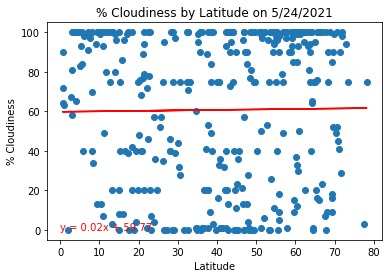

In [85]:
n_hemisphere = city_weather[city_weather['City_Latitude'] >= 0]
Latitude = n_hemisphere['City_Latitude']
Cloudiness = n_hemisphere['Cloudiness']

plt.xlabel('Latitude')
plt.ylabel('% Cloudiness')
plt.title('% Cloudiness by Latitude on 5/24/2021')

x_values = Latitude
y_values = Cloudiness
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=10,color="red")

print('There is no correlation between cloudiness and increasing latitude')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

There is no correlation between cloudiness and decreasing latitude


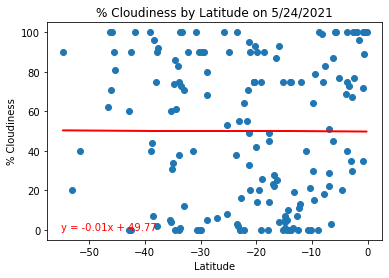

In [86]:
s_hemisphere = city_weather[city_weather['City_Latitude'] < 0]
Latitude = s_hemisphere['City_Latitude']
Cloudiness = s_hemisphere['Cloudiness']

plt.xlabel('Latitude')
plt.ylabel('% Cloudiness')
plt.title('% Cloudiness by Latitude on 5/24/2021')

x_values = Latitude
y_values = Cloudiness
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,0),fontsize=10,color="red")

print('There is no correlation between cloudiness and decreasing latitude')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

There is no correlation between wind speed and increasing latitude


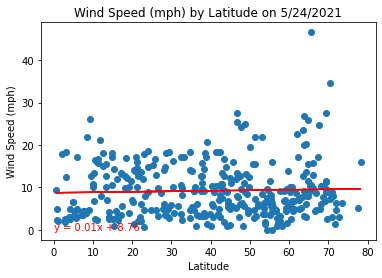

In [87]:
n_hemisphere = city_weather[city_weather['City_Latitude'] >= 0]
Latitude = n_hemisphere['City_Latitude']
Wind = n_hemisphere['Wind Speed']

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Wind Speed (mph) by Latitude on 5/24/2021')

x_values = Latitude
y_values = Wind
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=10,color="red")

print('There is no correlation between wind speed and increasing latitude')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

There is no correlation between wind speed and decreasing latitude


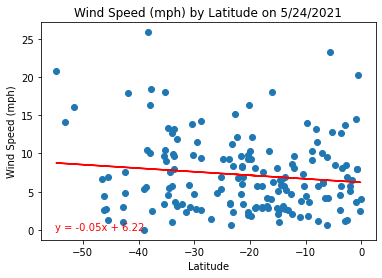

In [88]:
s_hemisphere = city_weather[city_weather['City_Latitude'] < 0]
Latitude = s_hemisphere['City_Latitude']
Wind = s_hemisphere['Wind Speed']

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Wind Speed (mph) by Latitude on 5/24/2021')

x_values = Latitude
y_values = Wind
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,0),fontsize=10,color="red")

print('There is no correlation between wind speed and decreasing latitude')